# RentSmart dataset Analysis (2016-present)
Dataset source: https://data.boston.gov/dataset/rentsmart


In [1]:
import pandas as pd
import numpy as np
import folium
from folium import plugins, Map
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/mariashevchuk/Downloads/RentSmart_2016-present.csv')
# remove duplicate data points
df = df.drop_duplicates()
df.head()

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,property_type,latitude,longitude
0,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"26-28 Isabella St, 02116",Boston,2116,501114000,TWENTY-6-28 ISABELLA ST COND,1899.0,2003.0,Condominium Main*,42.348620,-71.070480
1,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"254-256 Friend St, 02114",Boston,2114,301655000,PIZZUTI DONATO F,1899.0,2016.0,Mixed Use (Res. and Comm.),42.364488,-71.061337
2,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"293-295 Commonwealth Ave, 02115",Boston,2115,503569000,TWO 93 295 COMM AVE CONDO TR,1999.0,2018.0,Condominium Main*,42.350340,-71.085530
3,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"125 Salem St # 3, 02113",Boston,2113,302371000,MORAN RITA,1920.0,2002.0,Mixed Use (Res. and Comm.),42.364660,-71.055360
4,2023-02-24 00:00:00,Enforcement Violations,Improper storage trash: res,"34 Isabella St, 02116",Boston,2116,501112000,CHRISTO WILLIAM TRST ETAL,1899.0,1980.0,Residential 7 or more units,42.348610,-71.070770


<ipython-input-7-75b229ba7879>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(df['violation_type'].unique()),df['violation_type'].value_counts())


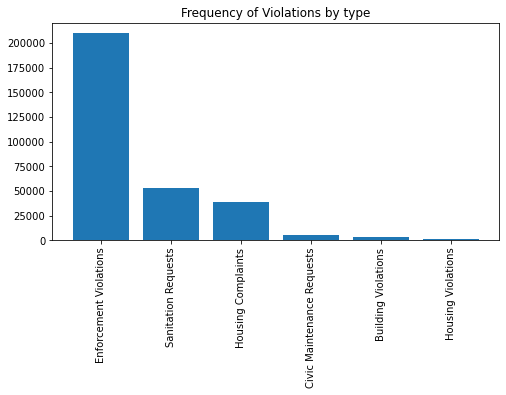

In [7]:
plt.figure(figsize =[8, 4])
plt.title('Frequency of Violations by type')
plt.subplot().bar(list(df['violation_type'].unique()),df['violation_type'].value_counts())
plt.xticks(rotation=90)
plt.show()


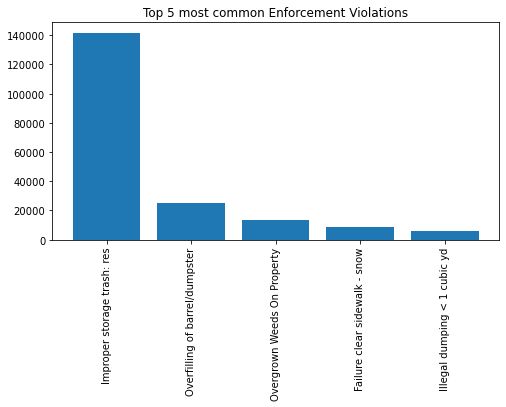

In [15]:
enf_violations = df[df['violation_type'] == 'Enforcement Violations']
top5_descriptions = enf_violations['description'].value_counts().nlargest(5) # get the top 5 descriptions
plt.figure(figsize=[8, 4])
plt.title('Top 5 most common Enforcement Violations')
plt.bar(top5_descriptions.index, top5_descriptions.values)
plt.xticks(rotation=90)
plt.show()

<ipython-input-16-a005692187e2>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(san_requests['description'].unique()),san_requests['description'].value_counts())


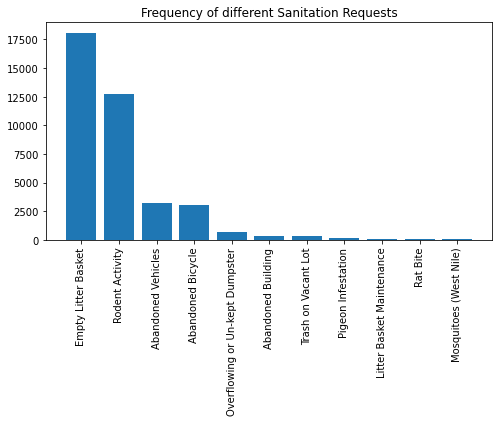

In [16]:
san_requests = df[df['violation_type'] == 'Sanitation Requests']
plt.figure(figsize =[8, 4])
plt.title('Frequency of different Sanitation Requests')
plt.subplot().bar(list(san_requests['description'].unique()),san_requests['description'].value_counts())
plt.xticks(rotation=90)
plt.show()

<ipython-input-20-da8f937086ee>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(hs_comlaints['description'].unique()),hs_comlaints['description'].value_counts())


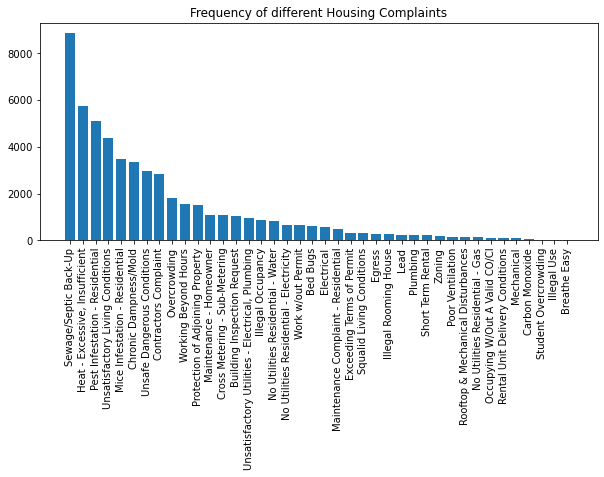

In [20]:
hs_comlaints = df[df['violation_type'] == 'Housing Complaints']
plt.figure(figsize =[10,4])
plt.title('Frequency of different Housing Complaints')
plt.subplot().bar(list(hs_comlaints['description'].unique()),hs_comlaints['description'].value_counts())
plt.xticks(rotation=90)
plt.show()

<ipython-input-21-5cd00fff4cf2>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(city['neighborhood'].unique()),city['neighborhood'].value_counts())


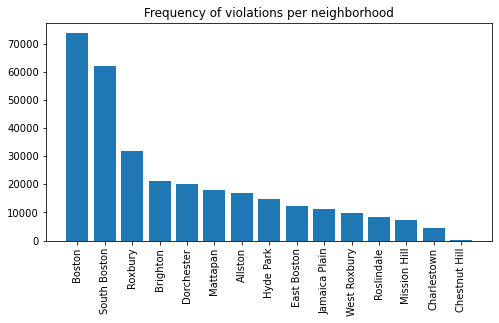

In [21]:
city = df[df['neighborhood'].notna()]
plt.figure(figsize =[8, 4])
plt.title('Frequency of violations per neighborhood')
plt.subplot().bar(list(city['neighborhood'].unique()),city['neighborhood'].value_counts())
plt.xticks(rotation=90)
plt.show()

In [8]:
locations = df[['latitude', 'longitude']]
location_list = locations.values.tolist()

m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)
# Add markers for each violation
for point in range(0, len(location_list)):
    folium.Marker(location_list[point]).add_to(m)
m

# Visualizations to be used for results dashboard

## Drop city all enforced violations
Keep Housing Complaints and Housing Violations

In [11]:
df_formap = df[df.violation_type.isin(['Housing Complaints', 'Housing Violations'])]
loc_formap= df_formap[['violation_type','latitude', 'longitude']]
loc_formap.to_csv('rentsmart_map.csv')
loc_formap.head()

,violation_type,latitude,longitude
24,Housing Complaints,42.28120,-71.07215
25,Housing Complaints,42.34554,-71.08974
26,Housing Complaints,42.34554,-71.08974
29,Housing Complaints,42.29957,-71.06851
31,Housing Complaints,42.32505,-71.09353


<ipython-input-14-3430f0552be7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city = df_formap[df['neighborhood'].notna()]
<ipython-input-14-3430f0552be7>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(city['neighborhood'].unique()),city['neighborhood'].value_counts())


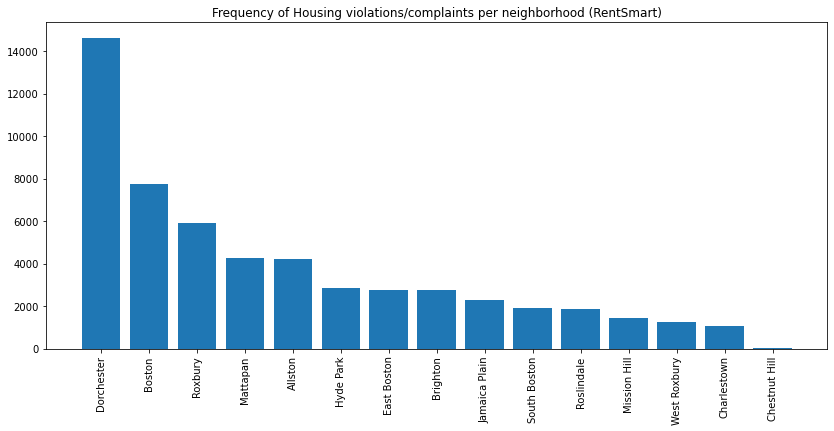

In [14]:
city = df_formap[df['neighborhood'].notna()]
plt.figure(figsize =[14, 6])
plt.title('Frequency of Housing violations/complaints per neighborhood (RentSmart)')
plt.subplot().bar(list(city['neighborhood'].unique()),city['neighborhood'].value_counts())
plt.xticks(rotation=90)
plt.show()

<ipython-input-15-7d96607165d2>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot().bar(list(hs_comlaints['description'].unique()),hs_comlaints['description'].value_counts())


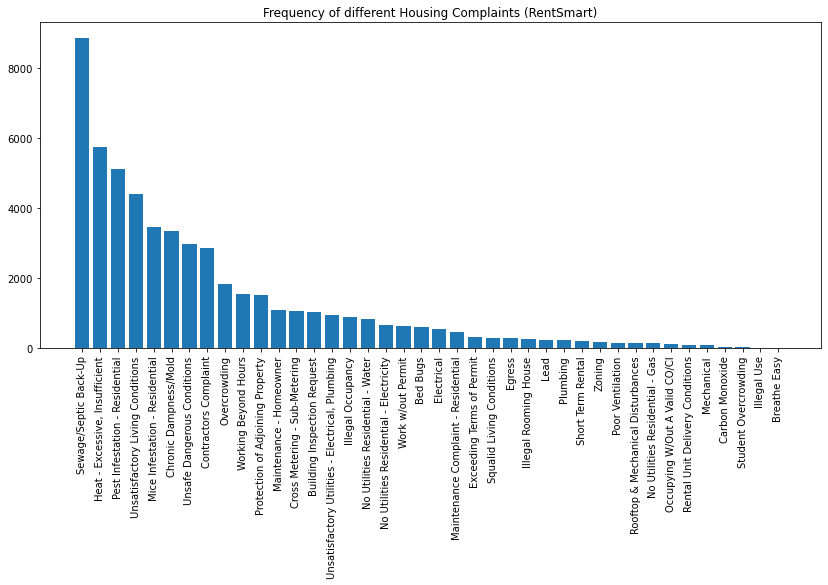

In [15]:
hs_comlaints = df[df['violation_type'] == 'Housing Complaints']
plt.figure(figsize =[14,6])
plt.title('Frequency of different Housing Complaints (RentSmart)')
plt.subplot().bar(list(hs_comlaints['description'].unique()),hs_comlaints['description'].value_counts())
plt.xticks(rotation=90)
plt.show()